# Entendendo o gradiente descendente ‚õ∞Ô∏è

O algoritmo do gradiente descendente √© um algoritmo de otimiza√ß√£o muito utilizado no aprendizado de m√°quina que √© capaz de **otimizar um processo de converg√™ncia para encontrar o menor erro poss√≠vel de um aprendizado de um algoritmo**. O grande objetivo desse algoritmo √© ajustar iterativamente os par√¢metros do algoritmo para **minimizar uma fun√ß√£o de custo**.

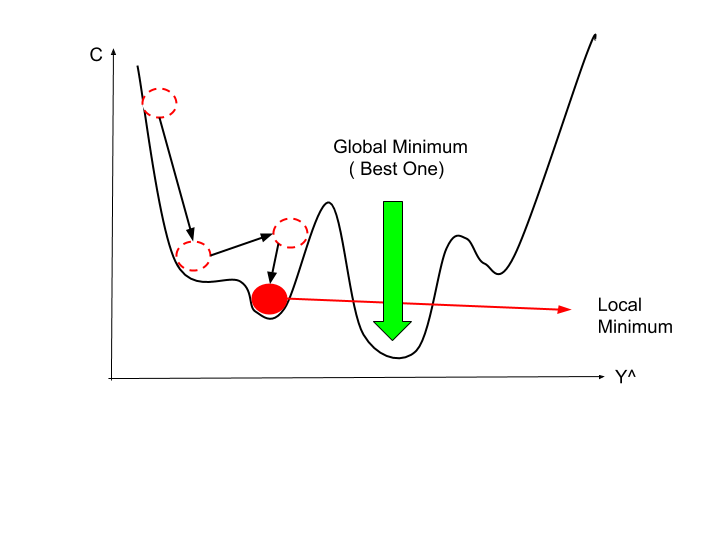

Para entendermos a aplica√ß√£o do gradiente em python, vamos nessa aula trabalhar com uma base de dados que cont√©m caracter√≠sticas de im√≥veis e vamos tentar prever o pre√ßo m√©dio do im√≥vel com o algoritmo de gradiente.

In [ ]:
import pandas as pd
dados = pd.read_csv('housing.csv', sep= ',')
dados.head()


longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [ ]:
set(dados['ocean_proximity'])

{'<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'}

In [ ]:
dados.shape

(20640, 10)

# Feature Engineering
Antes de iniciar a constru√ß√£o do gradiente, vamos tratar os dados categ√≥ricos antes de colocar os dados nas bases de treino e teste.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Instanciando a classe do OneHotEncoder
encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(dados[['ocean_proximity']]).toarray()
df_encoded = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['ocean_proximity']))

# Concatenar os novos dados codificados ao dados
df_encoded = pd.concat([dados, df_encoded], axis=1)
df_encoded = df_encoded.drop(['ocean_proximity'], axis=1)
df_encoded.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value  \
0       322.0       126.0         8.3252            452600.0   
1      2401.0      1138.0         8.3014            358500.0   
2       496.0       177.0         7.2574            352100.0   
3       558.0       219.0         5.6431            341300.0   
4       565.0       259.0         3.8462            342200.0   

   ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  ocean_proximity_ISLAND  \
0                        0.0                     0.0                     0.0   
1                        0.0                     0.0                     0.0   
2                        0.0                     0.0                     0.0   
3                        0.0                     0.0                     0.0   
4                        0.0                     0.0                     0.0   

   ocean_proximity_NEAR BAY  ocean_proximity_NEAR OCEAN  
0                       1.0                         0.0  
1                       1.0                         0.0  
2                       1.0                         0.0  
3                       1.0                         0.0  
4                       1.0                         0.0

# Data Clean

Vamos organizar os dados nulos.

In [ ]:
df_encoded.isnull().sum()

longitude                       0
latitude                        0
housing_median_age              0
total_rooms                     0
total_bedrooms                207
population                      0
households                      0
median_income                   0
median_house_value              0
ocean_proximity_<1H OCEAN       0
ocean_proximity_INLAND          0
ocean_proximity_ISLAND          0
ocean_proximity_NEAR BAY        0
ocean_proximity_NEAR OCEAN      0
dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
df_encoded_limpo = imputer.fit_transform(df_encoded)

In [ ]:
df_encoded_limpo = pd.DataFrame(df_encoded_limpo, columns=df_encoded.columns)
df_encoded_limpo.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value  \
0       322.0       126.0         8.3252            452600.0   
1      2401.0      1138.0         8.3014            358500.0   
2       496.0       177.0         7.2574            352100.0   
3       558.0       219.0         5.6431            341300.0   
4       565.0       259.0         3.8462            342200.0   

   ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  ocean_proximity_ISLAND  \
0                        0.0                     0.0                     0.0   
1                        0.0                     0.0                     0.0   
2                        0.0                     0.0                     0.0   
3                        0.0                     0.0                     0.0   
4                        0.0                     0.0                     0.0   

   ocean_proximity_NEAR BAY  ocean_proximity_NEAR OCEAN  
0                       1.0                         0.0  
1                       1.0                         0.0  
2                       1.0                         0.0  
3                       1.0                         0.0  
4                       1.0                         0.0

In [ ]:
df_encoded_limpo.isnull().sum()

longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms                0
population                    0
households                    0
median_income                 0
median_house_value            0
ocean_proximity_<1H OCEAN     0
ocean_proximity_INLAND        0
ocean_proximity_ISLAND        0
ocean_proximity_NEAR BAY      0
ocean_proximity_NEAR OCEAN    0
dtype: int64

# Separando os dados em treino e teste

In [ ]:
df_encoded_limpo.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity_<1H OCEAN',
       'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [ ]:
# Separando os dados em x e y
X = df_encoded_limpo.drop(['median_house_value'], axis=1)

y = df_encoded_limpo['median_house_value'].values

In [ ]:
X.shape

(20640, 13)

In [ ]:
y.shape

(20640,)

In [ ]:
X

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  ocean_proximity_<1H OCEAN  \
0           322.0       126.0         8.3252                        0.0   
1          2401.0      1138.0         8.3014                        0.0   
2           496.0       177.0         7.2574                        0.0   
3           558.0       219.0         5.6431                        0.0   
4           565.0       259.0         3.8462                        0.0   
...           ...         ...            ...                        ...   
20635       845.0       330.0         1.5603                        0.0   
20636       356.0       114.0         2.5568                        0.0   
20637      1007.0       433.0         1.7000                        0.0   
20638       741.0       349.0         1.8672                        0.0   
20639      1387.0       530.0         2.3886                        0.0   

       ocean_proximity_INLAND  ocean_proximity_ISLAND  \
0                         0.0                     0.0   
1                         0.0                     0.0   
2                         0.0                     0.0   
3                         0.0                     0.0   
4                         0.0                     0.0   
...                       ...                     ...   
20635                     1.0                     0.0   
20636                     1.0                     0.0   
20637                     1.0                     0.0   
20638                     1.0                     0.0   
20639                     1.0                     0.0   

       ocean_proximity_NEAR BAY  ocean_proximity_NEAR OCEAN  
0                           1.0                         0.0  
1                           1.0                         0.0  
2                           1.0                         0.0  
3                           1.0                         0.0  
4                           1.0                         0.0  
...                         ...                         ...  
20635                       0.0                         0.0  
20636                       0.0                         0.0  
20637                       0.0                         0.0  
20638                       0.0                         0.0  
20639                       0.0                         0.0  

[20640 rows x 13 columns]

# Padronizando/Normalizando as caracter√≠sticas

A transforma√ß√£o das features em escalas padronizadas √© **essencial para a fun√ß√£o de custo convergir no m√≠nimo local de forma mais r√°pida e eficiente**. Como voc√™ pode observar na figura abaixo, o algoritmo do gradiente descendente vai diretamente para o m√≠nimo local, atingindo rapidamente, enquanto √† direita, o gradiente primeiro avan√ßa em sentido quase ortogonal em dire√ß√£o ao m√≠nimo local e termina com uma longa marcha em um vale quase plano.

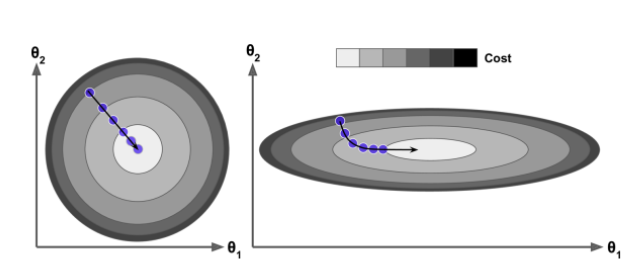

Primeiramente, vamos separar os dados em treino e teste e ap√≥s a separa√ß√£o, vamos aplicar a padroniza√ß√£o dos dados na base de treino e aplicar a transforma√ß√£o na base de teste.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
from sklearn.preprocessing import StandardScaler # z-score

# Inicializar o StandardScaler
scaler = StandardScaler()

# Ajustar o scaler apenas na base de treino
scaler.fit(X_train)

# Aplicar a transforma√ß√£o nas bases de treino e teste
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled

array([[ 1.27258656, -1.3728112 ,  0.34849025, ..., -0.01556621,
        -0.35564565,  2.62975816],
       [ 0.70916212, -0.87669601,  1.61811813, ..., -0.01556621,
        -0.35564565,  2.62975816],
       [-0.44760309, -0.46014647, -1.95271028, ..., -0.01556621,
        -0.35564565,  2.62975816],
       ...,
       [ 0.59946887, -0.75500738,  0.58654547, ..., -0.01556621,
        -0.35564565, -0.3802631 ],
       [-1.18553953,  0.90651045, -1.07984112, ..., -0.01556621,
        -0.35564565, -0.3802631 ],
       [-1.41489815,  0.99543676,  1.85617335, ..., -0.01556621,
         2.81178749, -0.3802631 ]])

# Aplicando o algoritmo de gradiente! ‚õ∞Ô∏è

Nessa aula vamos testar a aplica√ß√£o do **Gradiente descendente estoc√°stico (SGD)**. Voc√™ pode encontrar a aplica√ß√£o desse modelo no sklearn pelo link https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html


O gradiente descendente estoc√°stico escolhe uma **inst√¢ncia aleat√≥ria no conjunto de treinamento** em **cada etapa e calcula os gradientes baseados apenas nessa √∫nica inst√¢ncia**.

Isso torna esse tipo de gradiente **bem mais r√°pido**, pois poucos dados s√£o manipulados em cada itera√ß√£o. Uma √≥tima op√ß√£o para grandes conjuntos de dados, uma vez que apenas uma inst√¢ncia precisa estar na mem√≥ria a cada itera√ß√£o. Por√©m, devido a sua aleatoriedade (dai que vem a palavrinha estoc√°stica), esse algoritmo √© bem menos regular que o gradiente descendente em lote. **Em vez de diminuir suavemente at√© atingir o m√≠nimo, a fun√ß√£o de custo vai subir e descer, diminuindo apenas a m√©dia. Ao longo do tempo acabar√° bem perto do m√≠nimo, mas ao chegar l√°,  gradiente continua a rebater, nunca se estabilizando, gerando assim valores finais bons mas n√£o √≥timos**.

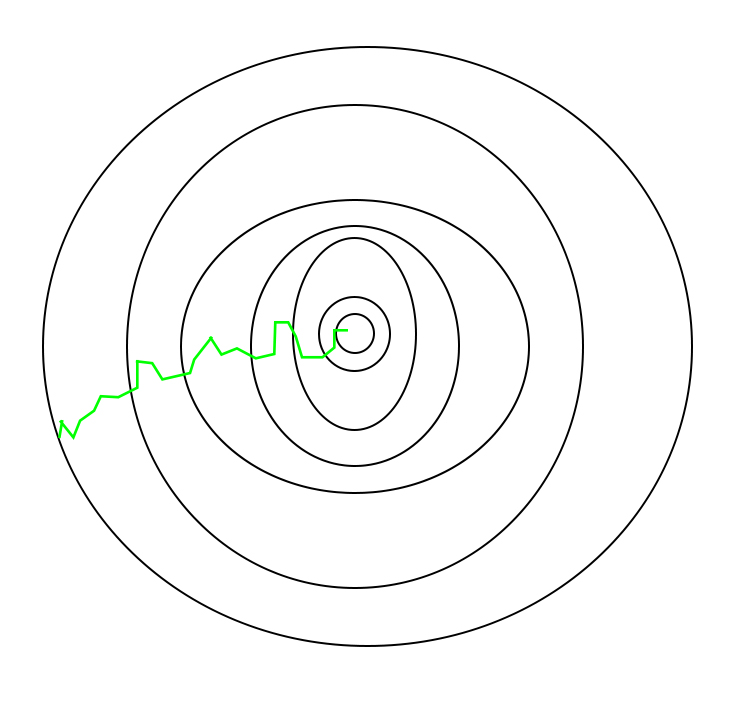

Quando a fun√ß√£o de custo √© muito irregular, pode ajudar o algoritmo a pular fora do m√≠nimo local, de modo que o gradiente estoc√°stico ter√° uma chance maior de encontrar o m√≠nimo global do que o gradiente em lote. Desta forma, a aleatoriedade √© boa para escapar de um √≥timo local, mas ruim porque significa que o algoritmo nunca pode se estabelecer no m√≠nimo. Uma boa solu√ß√£o para escapar dessa situa√ß√£o √© diminuir gradualmente a taxa de aprendizagem. As etapas come√ßam grandes, auxiliando a escapar dos m√≠nimos locais, e depois diminuir as etapas permitindo que o algoritmo se estabele√ßa no m√≠nimo global.


In [ ]:
from sklearn.linear_model import SGDRegressor
# A estrat√©gia learning_rate='optimal' √© geralmente uma boa escolha para problemas de regress√£o linear
# Especialmente quando a regulariza√ß√£o L2 √© utilizada.

# Treinar o modelo com SGDRegressor
sgd_reg = SGDRegressor(loss='squared_error',
                       learning_rate='optimal',
                       alpha=0.001,  # Quanto maior o valor, mais forte ser√° a regulariza√ß√£o.
                       penalty='l2', # adiciona uma penalidade √† fun√ß√£o de custo que √© proporcional √† soma dos quadrados dos
                                     # valores dos par√¢metros do modelo (evita o overfitting)
                       max_iter=1000)
sgd_reg.fit(X_train_scaled, y_train.ravel())

SGDRegressor(alpha=0.001, learning_rate='optimal')

# Principais par√¢metros do scikit-learn para descida do gradiente

- **loss** (*padr√£o='squared_loss*'): Fun√ß√£o de perda a ser minimizada (por exemplo, 'squared_loss' para erro quadr√°tico m√©dio).

- **learning_rate** (*padr√£o='invscaling*'): Estrat√©gia de taxa de aprendizado (por exemplo, 'invscaling' para taxa decrescente inversamente proporcional ao n√∫mero de itera√ß√µes).

- **alpha** (*padr√£o=0.0001*): Regulariza√ß√£o L1 ou L2 (par√¢metro de regulariza√ß√£o). Quanto maior o valor, mais forte ser√° a regulariza√ß√£o. Tamb√©m usado para calcular a taxa de aprendizagem quando *learning_rate* definido como 'optimal'. Os valores devem estar no intervalo .[0.0, inf).

- **penalty** (*padr√£o=l2*): Termo de regulariza√ß√£o a ser utilizado no modelo.

- **max_iter** (*padr√£o=1000*): N√∫mero m√°ximo de itera√ß√µes.

## Quais s√£o os tipos de regulariza√ß√£o e como escolher? üìâ

**Regulariza√ß√£o L1 (LASSO)**
Essa t√©cnica adiciona uma penalidade √† fun√ß√£o de custo que √© proporcional √† soma dos valores absolutos dos par√¢metros do modelo. Essa aplica√ß√£o de penalidade, auxilia o modelo a encontrar solu√ß√µes com menos par√¢metros (o que reduz a complexidade do modelo).

**Regulariza√ß√£o L2 (RIDGE)**
Essa t√©cnica adiciona uma penalidade √† fun√ß√£o de custo que √© proporcional √† soma dos quadrados dos valores dos par√¢metros do modelo. Esse tipo de penalidade evita que os par√¢metros dos modelos assumam valores muito grandes ( o que previne o overfitting).

**Elastic Net (combina√ß√£o de L1 e L2)**
Esse tipo de t√©cnica realiza a combina√ß√£o das regulariza√ß√µes L1 e L2, fornecendo assim flexibilidade na sele√ß√£o de features e na redu√ß√£o da complexidade do modelo.


# Validando o modelo com m√©tricas de regress√£o üîç

- **R¬≤**: O R¬≤ √© uma medida de **qu√£o bem o modelo se ajusta aos dados**. Ele varia de 0 a 1, onde 1 indica um ajuste perfeito.

- **Erro quadr√°tico m√©dio**: O erro quadr√°tico m√©dio √© uma medida da diferen√ßa entre os valores previstos e os valores reais. Ele √© calculado **somando os quadrados das diferen√ßas entre os valores previstos e os valores reais e dividindo pelo n√∫mero de observa√ß√µes**.

- **Erro absoluto m√©dio**: O erro absoluto m√©dio √© uma medida da diferen√ßa m√©dia entre os valores previstos e os valores reais. Ele √© **calculado somando as diferen√ßas absolutas entre os valores previstos e os valores reais e dividindo pelo n√∫mero de observa√ß√µes**.

- **Erro percentual absoluto m√©dio:** O erro percentual absoluto m√©dio √© uma medida da diferen√ßa m√©dia percentual entre os valores previstos e os valores reais. Ele √© calculado somando as diferen√ßas percentuais absolutas entre os valores previstos e os valores reais e dividindo pelo n√∫mero de observa√ß√µes.


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Avaliar o modelo na base de teste
y_pred = sgd_reg.predict(X_test_scaled)


r2 = r2_score(y_test, y_pred) # R¬≤
mse = mean_squared_error(y_test, y_pred) # Erro quadr√°tico m√©dio
mae = mean_absolute_error(y_test, y_pred) # Erro absoluto m√©dio

# Imprimir os resultados
print("R¬≤:", r2)
print("Erro quadr√°tico m√©dio:", mse)
print("Erro absoluto m√©dio:", mae)


R¬≤: 0.6231407001683475
Erro quadr√°tico m√©dio: 4938398100.329767
Erro absoluto m√©dio: 51007.293680765426


In [ ]:
import numpy as np

def mapr(y_true, y_pred):
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mapr_sgd = mapr(y_test, y_pred)
print("Erro percentual absoluto m√©dio:", mapr_sgd)


Erro percentual absoluto m√©dio: 29.434639011149315


# Utilizando o gradiente nas redes neurais

Tamb√©m podemos utilizar os gradientes nas redes neurais! Utilizando o modelo de Regressor Perceptron multicamadas.

Este modelo **otimiza o erro quadr√°tico usando descida gradiente estoc√°stica** como uma de suas poss√≠veis op√ß√µes de minimiza√ß√£o da fun√ß√£o de custo.


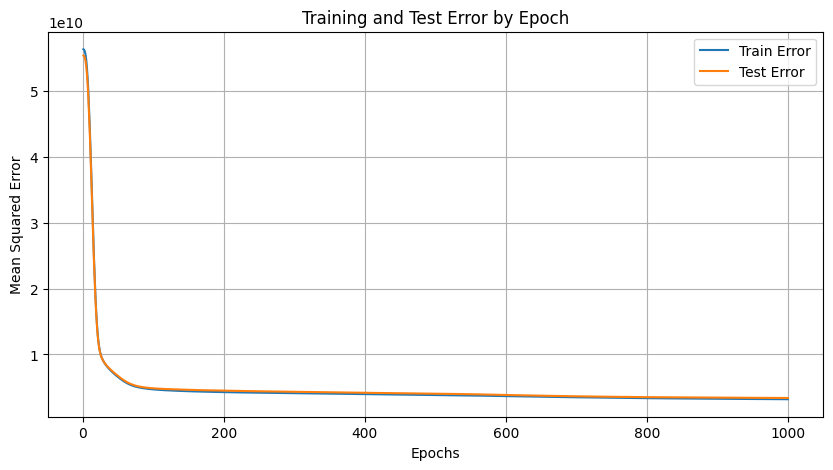

In [ ]:
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt

# Define the MLPRegressor model
model_mlp_regressor = MLPRegressor(hidden_layer_sizes=(100, 50),
                                   max_iter=1000,
                                   activation='relu',
                                   learning_rate='adaptive',
                                   solver='adam',
                                   alpha=0.0001)

# Gradiente adam ("Adaptive Moment Estimation"):
# ajusta iterativamente os pesos da rede neural usando momentos adaptativos dos gradientes.
# O segredo do ADAM reside em sua combina√ß√£o inteligente de duas t√©cnicas bem-sucedidas:
  # Momentum: Essa t√©cnica acumula os gradientes anteriores, impulsionando o movimento em dire√ß√µes consistentes e suavizando o caminho de otimiza√ß√£o.
  # RMSprop (Root Mean Square Prop): Esse m√©todo ajusta adaptativamente a taxa de aprendizado para cada par√¢metro com base no hist√≥rico recente de seus gradientes.
# Isso permite uma converg√™ncia eficiente e robusta, especialmente √∫til em problemas com grande dimensionalidade ou em presen√ßa de ru√≠do.

# Treinar o modelo
epochs = 1000
train_errors = []
test_errors = []

for epoch in range(epochs):
    model_mlp_regressor.partial_fit(X_train_scaled, y_train.ravel())

    # Calcular erro de treinamento
    train_pred = model_mlp_regressor.predict(X_train_scaled)
    train_error = mean_squared_error(y_train.ravel(), train_pred)
    train_errors.append(train_error)

    # Calcular erro de teste
    test_pred = model_mlp_regressor.predict(X_test_scaled)
    test_error = mean_squared_error(y_test.ravel(), test_pred)
    test_errors.append(test_error)

# Plotar resultados
plt.figure(figsize=(10, 5))
plt.plot(range(1, epochs + 1), train_errors, label='Train Error')
plt.plot(range(1, epochs + 1), test_errors, label='Test Error')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('Training and Test Error by Epoch')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Avaliar o modelo na base de teste
y_pred_model_mlp_regressor = model_mlp_regressor.predict(X_test_scaled)

r2_y_pred_model_mlp_regressor = r2_score(y_test, y_pred_model_mlp_regressor) # R¬≤
mse_y_pred_model_mlp_regressor = mean_squared_error(y_test, y_pred_model_mlp_regressor) # Erro quadr√°tico m√©dio
mae_y_pred_model_mlp_regressor = mean_absolute_error(y_test, y_pred_model_mlp_regressor) # Erro absoluto m√©dio
mapr_pred_model_mlp_regressor = mapr(y_test, y_pred_model_mlp_regressor)


# Imprimir os resultados
print("R¬≤:", r2_y_pred_model_mlp_regressor)
print("Erro quadr√°tico m√©dio:", mse_y_pred_model_mlp_regressor)
print("Erro absoluto m√©dio:", mae_y_pred_model_mlp_regressor)
print("Erro percentual absoluto m√©dio:", mapr_pred_model_mlp_regressor)

# Testando modelos mais robustos

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train_scaled, y_train.ravel())

# Avaliar o modelo na base de teste
y_pred_model_rf_regressor = rf_regressor.predict(X_test_scaled)

r2_y_pred_model_rf_regressor = r2_score(y_test, y_pred_model_rf_regressor) # R¬≤
mse_y_pred_model_rf_regressor = mean_squared_error(y_test, y_pred_model_rf_regressor) # Erro quadr√°tico m√©dio
mae_y_pred_model_rf_regressor = mean_absolute_error(y_test, y_pred_model_rf_regressor) # Erro absoluto m√©dio
mapr_pred_model_rf_regressor = mapr(y_test, y_pred_model_rf_regressor)


# Imprimir os resultados
print("R¬≤:", r2_y_pred_model_rf_regressor)
print("Erro quadr√°tico m√©dio:", mse_y_pred_model_rf_regressor)
print("Erro absoluto m√©dio:", mae_y_pred_model_rf_regressor)
print("Erro percentual absoluto m√©dio:", mapr_pred_model_rf_regressor)